## 단어 빈도 분석
- 전체 문서 또는 문서별 단어 출현빈도
- 가장 기본적이지만 쉽고 보편적으로 활용되는 방법
  - 본격적인 분석 전 데이터에 대한 이해와 흐름을 살펴보기 위한 기초 분석에 해당
- 불용어들은 사전에 제거한 후 단어빈도를 분석해야함
- 워드클라우드로 시각화
  - pip install wordcloud

In [4]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [5]:
# 인코딩 타입은file -1 filename 으로 알 수 있음
f = open('data/트럼프취임연설문.txt', 'r', encoding='iso-8859-1') 
# 'r' read 읽기전용, 'a' append, 'w' write
lines = f.readlines()[0]
f.close()

In [6]:
lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [7]:
# 단어 단위로 토큰화
words = lines.lower()
tokenizer = RegexpTokenizer('[\w]+')
# \w 알파 뉴메릭(alpha numeric, 문자+숫자와 매치, [a-zA-Z0-9_]와 동일한 표현) + 하나 이상
# W는 알파 뉴메릭이 아닌 문자와 매치 
tokens = tokenizer.tokenize(words)

# 불용어 및 한 글자 제거
stop_words = stopwords.words('english')
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]

In [8]:
# 단어 빈도 카운트
# pd는 리스트를 처리하지 못하므로 Series라는 클래스에 stopped_tokens2를 넣어줘서 처리
pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
never        6
new          6
dtype: int64

                <상대경로>  <절대경로>
현재 디렉토리        .      /home/cowjd@WIN-USHVMDBMGQK/work/social
부모 디렉토리        ..     /home/cowjd@WIN-USHVMDBMGQK/work

In [9]:
import os
java_home = os.environ.get('JAVA_HOME', None)
if not java_home:
    java_path = 'C:/Program Files/Java/jdk-14.0.1/bin'
    os.environ['JAVA_HOME'] = java_path
else:
    print(java_home)

/usr/lib/jvm/java-8-openjdk-amd64


In [10]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = open("data/문재인대통령취임연설문.txt", 'r', encoding='cp949')
lines = f.readlines()
f.close()

# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
나라       6
국민들      6
역사       6
대통령의     5
세상       5
dtype: int64

우분투 리눅스의 경우 다음 명령어를 실행하여 한글 폰트를 설치
- $ sudo apt install fonts-nanum fonts-nanum-coding fonts-nanum-extra

In [11]:
from wordcloud import WordCloud
from collections import Counter

# 폰트 경로 설정
# font_path = 'C:/Windows/Fonts/malgun.ttf'
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

In [12]:
count = Counter(stopped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)

In [13]:
array = wordcloud.to_array()

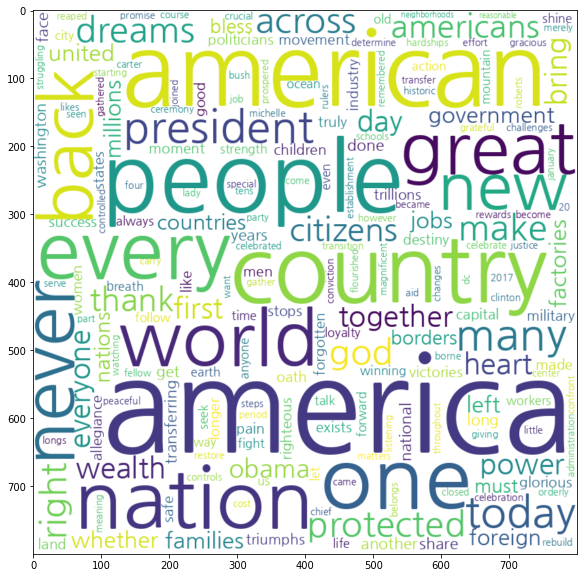

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

In [17]:
count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

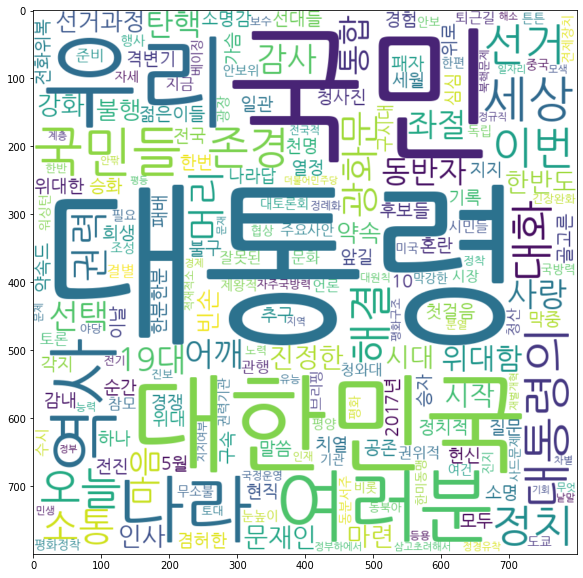

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')